🎯 Desafio dia 75 — Transações em Farmácia

📂 Dataset: desafio_dia_75_transacoes_farmacia.csv

🔍 Contexto: Você está analisando as transações realizadas em uma rede de farmácias. As vendas incluem produtos de diferentes categorias, preços variados e formas de pagamento diversas. Seu objetivo é entender o perfil das compras e prever o valor total gasto por transação.

🛠️ Tarefas do desafio:
Tratamento de dados

- Preencha os valores ausentes da coluna preco_unitario com a média da categoria correspondente.

- Preencha os valores ausentes da coluna forma_pagamento com o valor mais frequente.

Análise geral

- Qual é o produto com o maior ticket médio (valor_total)?

- Qual é a forma de pagamento mais utilizada?

Visualização de dados

- Crie um gráfico de barras com o valor total movimentado por categoria de produto.

Machine Learning - Regressão

- Crie um modelo de regressão (LinearRegression ou RandomForestRegressor) para prever o valor_total da transação com base em:

    produto, categoria, preco_unitario, quantidade, forma_pagamento

    Utilize train_test_split e get_dummies para codificar as variáveis categóricas.

    Avalie o desempenho do modelo com mean_squared_error.

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("desafio_dia_75_transacoes_farmacia.csv")
df.head()

,id_transacao,produto,categoria,preco_unitario,quantidade,forma_pagamento,valor_total
0,3001,Paracetamol,Analgésico,68.39,1,Dinheiro,68.39
1,3002,Paracetamol,Antibiótico,16.24,4,Cartão Débito,64.96
2,3003,Vitamina C,Vitamina,8.64,3,Pix,25.92
3,3004,Dipirona,Vitamina,63.28,3,Cartão Débito,189.84
4,3005,Paracetamol,Antibiótico,75.35,4,Cartão Crédito,301.40


In [3]:
#Preencha os valores ausentes da coluna preco_unitario com a média da categoria correspondente.
df["preco_unitario"] = df["preco_unitario"].fillna(
    df.groupby("categoria")["preco_unitario"].transform("mean")
)
df["preco_unitario"].isna().sum()

np.int64(0)

In [4]:
#Preencha os valores ausentes da coluna forma_pagamento com o valor mais frequente.
df["forma_pagamento"] = df["forma_pagamento"].fillna(df["forma_pagamento"].mode()[0])
df["forma_pagamento"].isna().sum()

np.int64(0)

In [6]:
#Qual é o produto com o maior ticket médio (valor_total)?
produto_ticket = df.groupby("produto")["valor_total"].mean().sort_values(ascending=False).round(2)
print(produto_ticket)

produto
Vitamina C      111.85
Ibuprofeno      108.65
Paracetamol     106.48
Xarope          104.99
Dipirona        102.91
Antialérgico     91.13
Name: valor_total, dtype: float64


In [9]:
#Qual é a forma de pagamento mais utilizada?
forma_pagamento_utilizada = df["forma_pagamento"].value_counts()
print(forma_pagamento_utilizada)

forma_pagamento
Cartão Crédito    151
Cartão Débito     112
Dinheiro          102
Pix                95
Name: count, dtype: int64


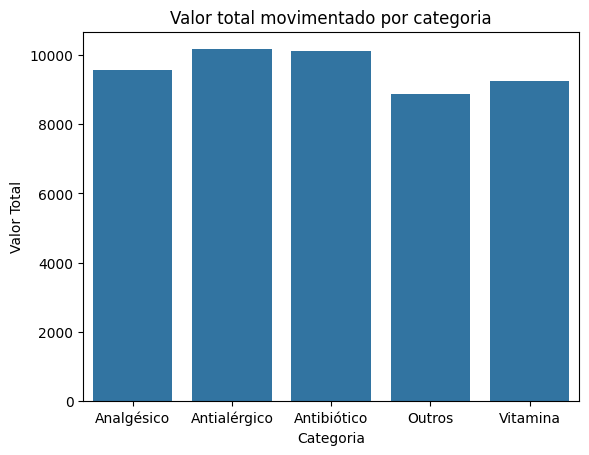

In [17]:
#Crie um gráfico de barras com o valor total movimentado por categoria de produto.
valor_total = df.groupby("categoria")["valor_total"].sum().reset_index()

sns.barplot(valor_total, x="categoria", y="valor_total")
plt.title("Valor total movimentado por categoria")
plt.ylabel("Valor Total")
plt.xlabel("Categoria")
plt.show()

In [21]:
#Crie um modelo de regressão para prever o valor_total da transação com base em:
X = df[["produto", "categoria", "preco_unitario", "quantidade", "forma_pagamento"]]
y = df["valor_total"]

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = RandomForestRegressor(random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print(mean_squared_error(y_test, y_pred))

131.46224010115947
